In [5]:
#import libraries 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


df = pd.read_csv('Cleaned-Data3.csv') 
df.head(7)

,Fever,Tiredness,Dry-Cough,Difficulty-in-Breathing,Sore-Throat,Pains,Nasal-Congestion,Runny-Nose,Diarrhea,infected
0,1,1,1,1,1,1,1,1,1,1
1,1,1,1,1,1,1,1,1,1,1
2,1,1,1,1,1,1,1,1,1,1
3,1,1,1,1,1,1,1,1,1,1
4,1,1,1,1,1,1,1,1,1,1
5,1,1,1,1,1,1,1,1,1,1
6,1,1,1,1,1,1,1,1,1,1


In [6]:
#df['fever']= df['fever'].astype(int)
#df['fever']
df

,Fever,Tiredness,Dry-Cough,Difficulty-in-Breathing,Sore-Throat,Pains,Nasal-Congestion,Runny-Nose,Diarrhea,infected
0,1,1,1,1,1,1,1,1,1,1
1,1,1,1,1,1,1,1,1,1,1
2,1,1,1,1,1,1,1,1,1,1
3,1,1,1,1,1,1,1,1,1,1
4,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...
316795,0,0,0,0,0,0,0,0,0,0
316796,0,0,0,0,0,0,0,0,0,0
316797,0,0,0,0,0,0,0,0,0,0
316798,0,0,0,0,0,0,0,0,0,0


In [7]:
df.shape

(316800, 10)

In [8]:
df['infected'].value_counts()

0    313200
1      3600
Name: infected, dtype: int64

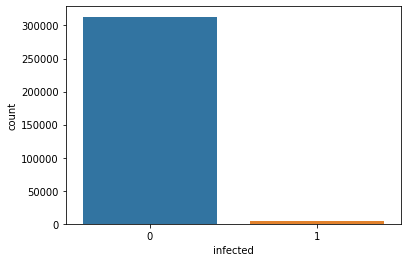

In [9]:
sns.countplot(df['infected'],label="Count")

In [10]:
df.dtypes

Fever                      int64
Tiredness                  int64
Dry-Cough                  int64
Difficulty-in-Breathing    int64
Sore-Throat                int64
Pains                      int64
Nasal-Congestion           int64
Runny-Nose                 int64
Diarrhea                   int64
infected                   int64
dtype: object

In [7]:
#df['fever'] = df['fever'].astype(int)

In [11]:
X = df.iloc[:, 2:5].values 
Y = df.iloc[:, 1].values 

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0)

In [13]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [14]:
def models(X_train,Y_train):
    
    #Using Logistic Regression
    log = LogisticRegression(random_state = 0)
    log.fit(X_train, Y_train)
    
    #Using KNeighborsClassifier 
    knn = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
    knn.fit(X_train, Y_train)

    #Using SVC linear
    svc_lin = SVC(kernel = 'linear', random_state = 0)
    svc_lin.fit(X_train, Y_train)

    #Using SVC rbf
    svc_rbf = SVC(kernel = 'rbf', random_state = 0)
    svc_rbf.fit(X_train, Y_train)

    #Using GaussianNB 
    gauss = GaussianNB()
    gauss.fit(X_train, Y_train)

    #Using DecisionTreeClassifier 
    tree = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
    tree.fit(X_train, Y_train)

    #Using RandomForestClassifier method of ensemble class to use Random Forest Classification algorithm
    forest = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
    forest.fit(X_train, Y_train)
  
    #print model accuracy on the training data.
    print('[0]Logistic Regression Training Accuracy:', log.score(X_train, Y_train))
    print('[1]K Nearest Neighbor Training Accuracy:', knn.score(X_train, Y_train))
    print('[2]Support Vector Machine (Linear Classifier) Training Accuracy:', svc_lin.score(X_train, Y_train))
    print('[3]Support Vector Machine (RBF Classifier) Training Accuracy:', svc_rbf.score(X_train, Y_train))
    print('[4]Gaussian Naive Bayes Training Accuracy:', gauss.score(X_train, Y_train))
    print('[5]Decision Tree Classifier Training Accuracy:', tree.score(X_train, Y_train))
    print('[6]Random Forest Classifier Training Accuracy:', forest.score(X_train, Y_train))
  
    return log, knn, svc_lin, svc_rbf, gauss, tree, forest

In [15]:
model = models(X_train,Y_train)

[0]Logistic Regression Training Accuracy: 0.6873151154401155
[1]K Nearest Neighbor Training Accuracy: 0.6873151154401155
[2]Support Vector Machine (Linear Classifier) Training Accuracy: 0.6873151154401155
[3]Support Vector Machine (RBF Classifier) Training Accuracy: 0.6877074314574314
[4]Gaussian Naive Bayes Training Accuracy: 0.6873151154401155
[5]Decision Tree Classifier Training Accuracy: 0.6877074314574314
[6]Random Forest Classifier Training Accuracy: 0.6877074314574314


In [16]:
from sklearn.metrics import confusion_matrix
for i in range(len(model)):
    cm = confusion_matrix(Y_test, model[i].predict(X_test))
  
    TN = cm[0][0]
    TP = cm[1][1]
    FN = cm[1][0]
    FP = cm[0][1]
  
    print(cm)
    print('Model[{}] Testing Accuracy = "{}!"'.format(i,  (TP + TN) / (TP + TN + FN + FP)))
    print()# Print a new line

[[29576 17858]
 [11801 35805]]
Model[0] Testing Accuracy = "0.6879313973063973!"

[[29576 17858]
 [11801 35805]]
Model[1] Testing Accuracy = "0.6879313973063973!"

[[29576 17858]
 [11801 35805]]
Model[2] Testing Accuracy = "0.6879313973063973!"

[[17688 29746]
 [    0 47606]]
Model[3] Testing Accuracy = "0.6870159932659933!"

[[29576 17858]
 [11801 35805]]
Model[4] Testing Accuracy = "0.6879313973063973!"

[[17688 29746]
 [    0 47606]]
Model[5] Testing Accuracy = "0.6870159932659933!"

[[17688 29746]
 [    0 47606]]
Model[6] Testing Accuracy = "0.6870159932659933!"



In [17]:
# After 5-fold Cross Validation:

In [18]:
from sklearn.model_selection import cross_val_score

In [19]:
log_cv = cross_val_score(LogisticRegression(random_state = 0), X_train, Y_train, cv=5)
print("Logistic Regression: ", log_cv)

knn_cv = cross_val_score(KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2), X_train, Y_train, cv=5)
print("K Nearest Neighbor Classifier: ", knn_cv)

svc_lin_cv = cross_val_score(SVC(kernel = 'linear', random_state = 0), X_train, Y_train, cv=5)
print("Support Vector Machine (Linear Classifier): ",svc_lin_cv)


svc_rbf_cv = cross_val_score(SVC(kernel = 'rbf', random_state = 0), X_train, Y_train, cv=5)
print("Support Vector Machine (RBF Classifier): ",svc_rbf_cv)

gauss_cv = cross_val_score(GaussianNB(), X_train, Y_train, cv=5)
print("Gaussian Naive Bayes: ", gauss_cv)

tree_cv = cross_val_score(DecisionTreeClassifier(criterion = 'entropy', random_state = 0), X_train, Y_train, cv=5)
print("Decision Tree Classifier: ", tree_cv)

forest_cv = cross_val_score(RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0), X_train, Y_train, cv=5)
print("Random Forest Classifier: ", forest_cv)

Logistic Regression:  [0.68752255 0.68979978 0.68765783 0.6871167  0.68447872]
K Nearest Neighbor Classifier:  [0.56416847 0.68934885 0.6246618  0.62513528 0.62614989]
Support Vector Machine (Linear Classifier):  [0.68752255 0.68979978 0.68765783 0.6871167  0.68447872]
Support Vector Machine (RBF Classifier):  [0.68792839 0.68934885 0.68862734 0.68682359 0.68580898]
Gaussian Naive Bayes:  [0.68752255 0.68979978 0.68765783 0.6871167  0.68447872]
Decision Tree Classifier:  [0.68792839 0.68934885 0.68862734 0.68682359 0.68580898]
Random Forest Classifier:  [0.68792839 0.68934885 0.68862734 0.68682359 0.68580898]


In [20]:
log_cv_average = np.average(log_cv)
print("Logistic Regression Accuracy: ", log_cv_average)

knn_cv_average = np.average(knn_cv)
print("K Nearest Neighbor Classifier Accuracy: ", knn_cv_average)

svc_lin_cv_average = np.average(svc_lin_cv)
print("Support Vector Machine - Linear Classifier Accuracy: ", svc_lin_cv_average)

svc_rbf_cv_average = np.average(svc_rbf_cv)
print("Support Vector Machine - RBF Classifier Accuracy: ", svc_rbf_cv_average)

gauss_cv_average = np.average(gauss_cv)
print("Gaussian Naive Bayes Classifier Accuracy: ", gauss_cv_average)

tree_cv_average = np.average(tree_cv)
print("Decision Tree Classifier Accuracy: ", tree_cv_average)

forest_cv_average = np.average(forest_cv)
print("Random Forest Classifier Accuracy: ", forest_cv_average)

Logistic Regression Accuracy:  0.6873151154401154
K Nearest Neighbor Classifier Accuracy:  0.6258928571428571
Support Vector Machine - Linear Classifier Accuracy:  0.6873151154401154
Support Vector Machine - RBF Classifier Accuracy:  0.6877074314574315
Gaussian Naive Bayes Classifier Accuracy:  0.6873151154401154
Decision Tree Classifier Accuracy:  0.6877074314574315
Random Forest Classifier Accuracy:  0.6877074314574315


In [21]:
# So we see among six model K Nearest Neighbor Classifier gives the best velue, so we should use it to make the final model

In [22]:
def model_KNN(X_train,Y_train):
    
    #Using KNeighborsClassifier 
    knn = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
    knn.fit(X_train, Y_train)
    print('[1]K Nearest Neighbor Training Accuracy:', knn.score(X_train, Y_train))
  
    return knn

In [23]:
model_KNN = model_KNN(X_train,Y_train)

[1]K Nearest Neighbor Training Accuracy: 0.6873151154401155


In [24]:

import pickle
with open('corona_detection_model_KNN.pickle','wb') as f:
    pickle.dump(model_KNN,f)

In [25]:
import json
columns = {
    'data_columns' : [col.lower() for col in df.columns]
}
with open("Corona_detection_columns.json","w") as f:
    f.write(json.dumps(columns))